## Data Visualization For All Stock Indices

In [ ]:
from pathlib import Path
import sys

sys.path.append(str(Path('..').resolve()))
import src.data_loader as data_loader
import src.visualization as visualization

Added project root to path


Loading raw data from ../data/indexData.csv...


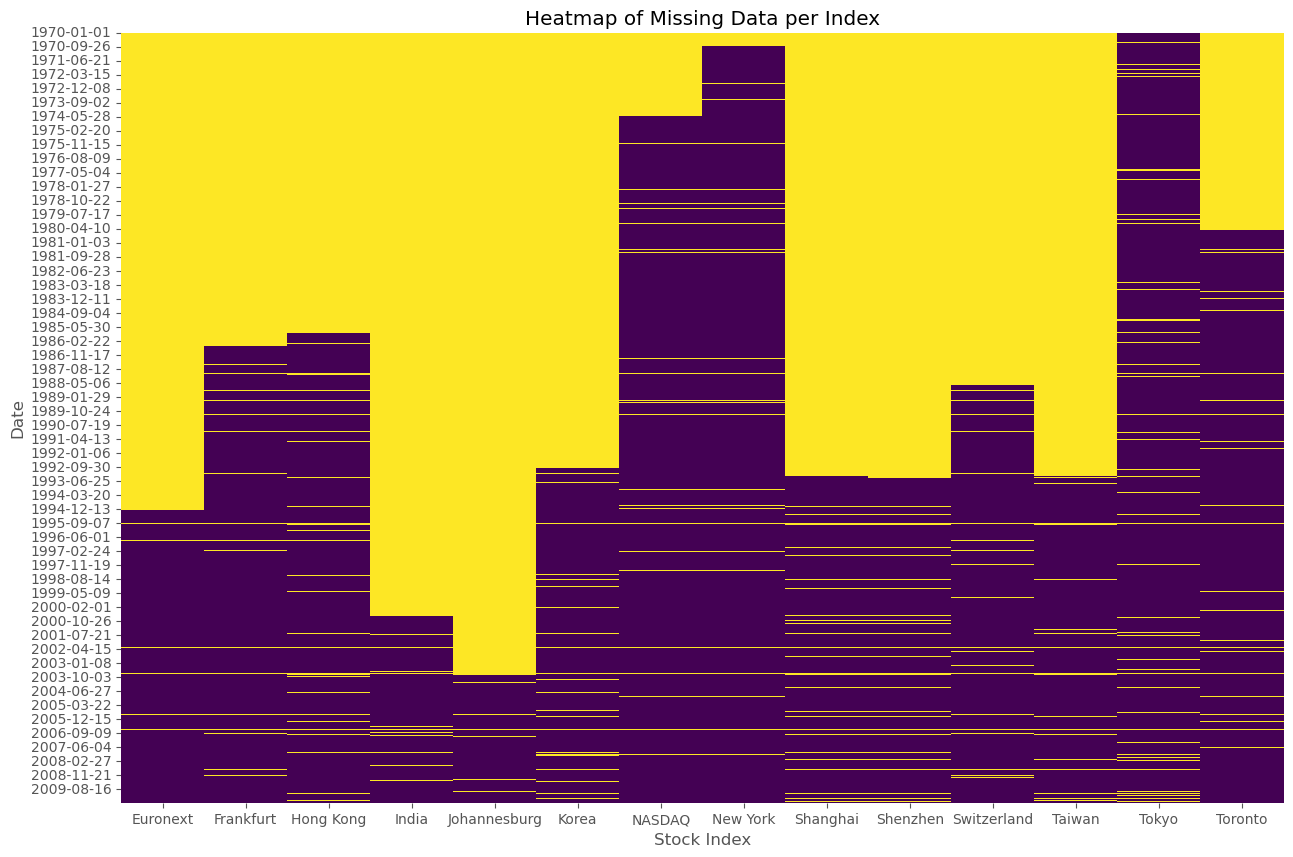

In [2]:
df_raw_all = data_loader.load_raw_data()
df_raw_pivot = df_raw_all.pivot(index='date', columns='stock_index', values='close')
visualization.plot_missing_heatmap(df_raw_pivot)

As we can see from the diagram, all the stock indices had been there since 2003-10-03, so we'll set October 04, 2004 as the cutoff date for comparison in later step to visualize the stock indices growth comparison.

c:\Users\markc\OneDrive\Documents\[2]DSI_project\DSI_TeamProject\src\visualization.py:113: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  perc_str = perc_filtered.applymap(lambda x: f"({x:.1f}%)") # e.g., (50.0%)


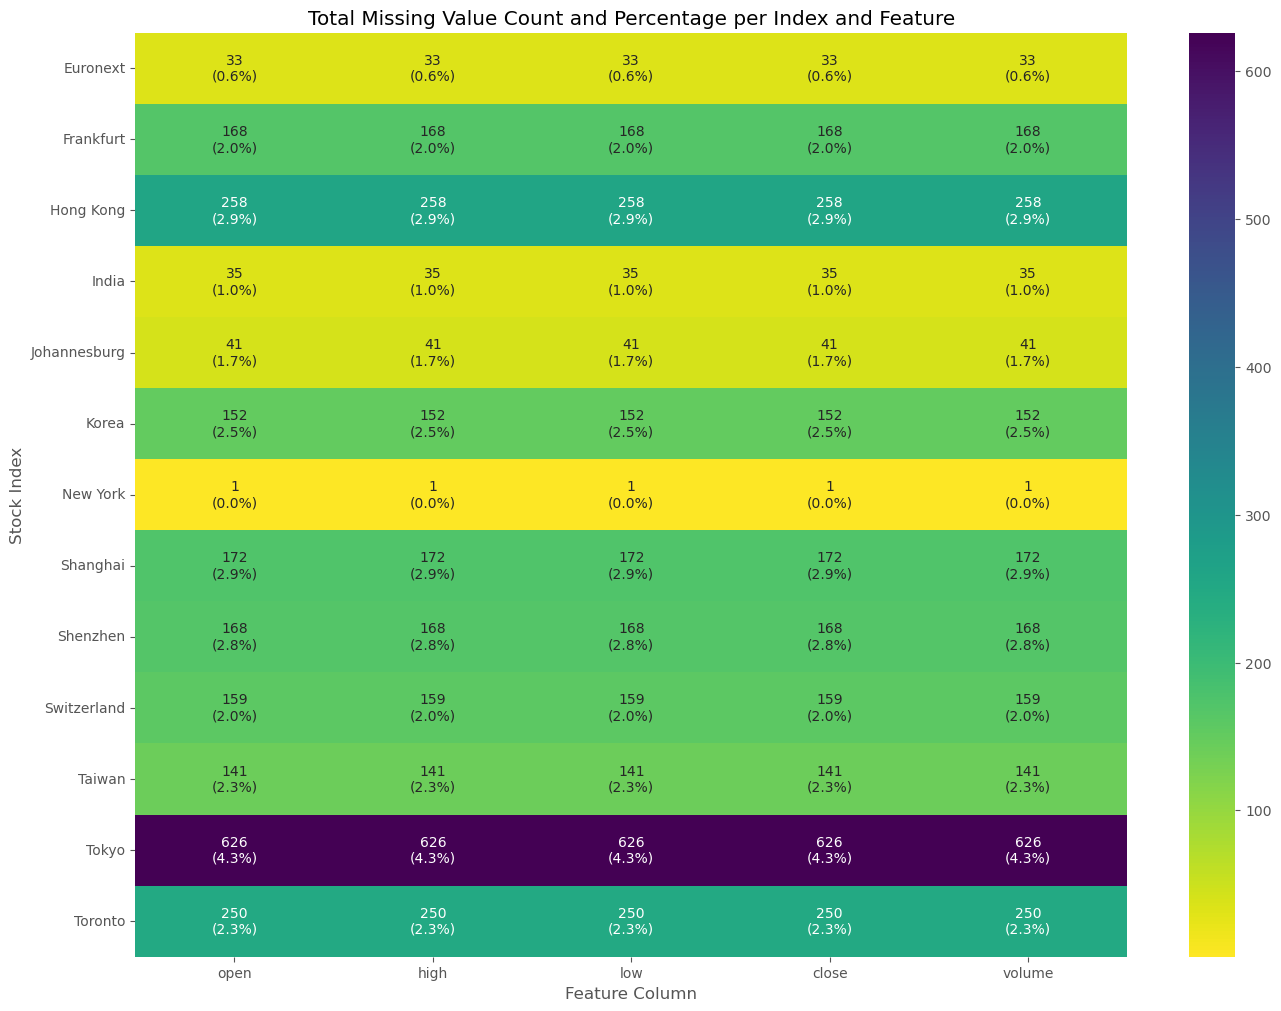

In [3]:
visualization.plot_missing_counts_by_index(df_raw_all)

Based on the missing values heatmap, we can tell NYA is the index that has the least missing data.

However, except for N225(4.3%), all other indices are working fine on missing data as below 3%

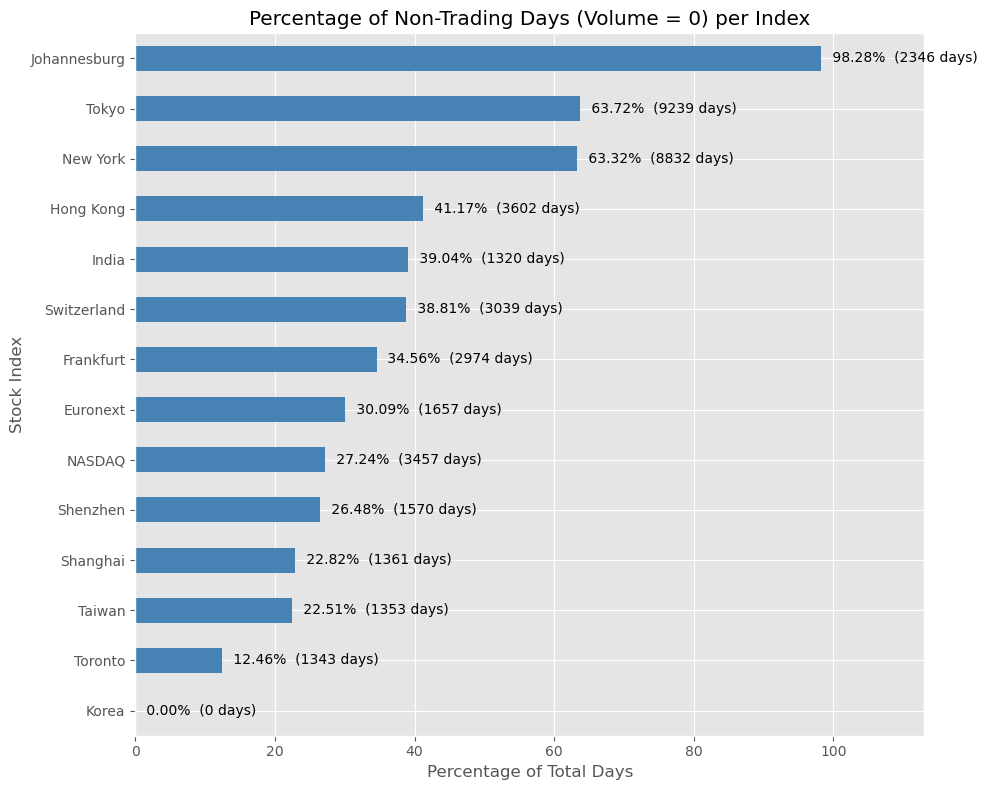

In [4]:
visualization.plot_zero_volume_counts_by_index(df_raw_all)

If we count normal non-trading days per year as 115 days(104 weekend days + 11 holidays), then the percentage of non-trading days per total days should be 115/365=31.5%. So, we can divide the non-trading days percentage data into 3 categories:
- 0.0%, it means the data of the index has been cleaned, perfect
- around 31.5%, it means the data of the index matches, perfect
- too big or too small number deviated from 31.5%, red flag

Based on the criteria, we can accept:
- KS11 (0.00%)
- N100 (30.09%)

The missing columns for KS11 is 152, 2.5%, and for N100 is 33, 0.6%, both are good options. They both have similar data size(5500~6100). However, N100 is better since it has much less missing data. So we'll choose N100 for further operations.

<Figure size 1500x800 with 0 Axes>

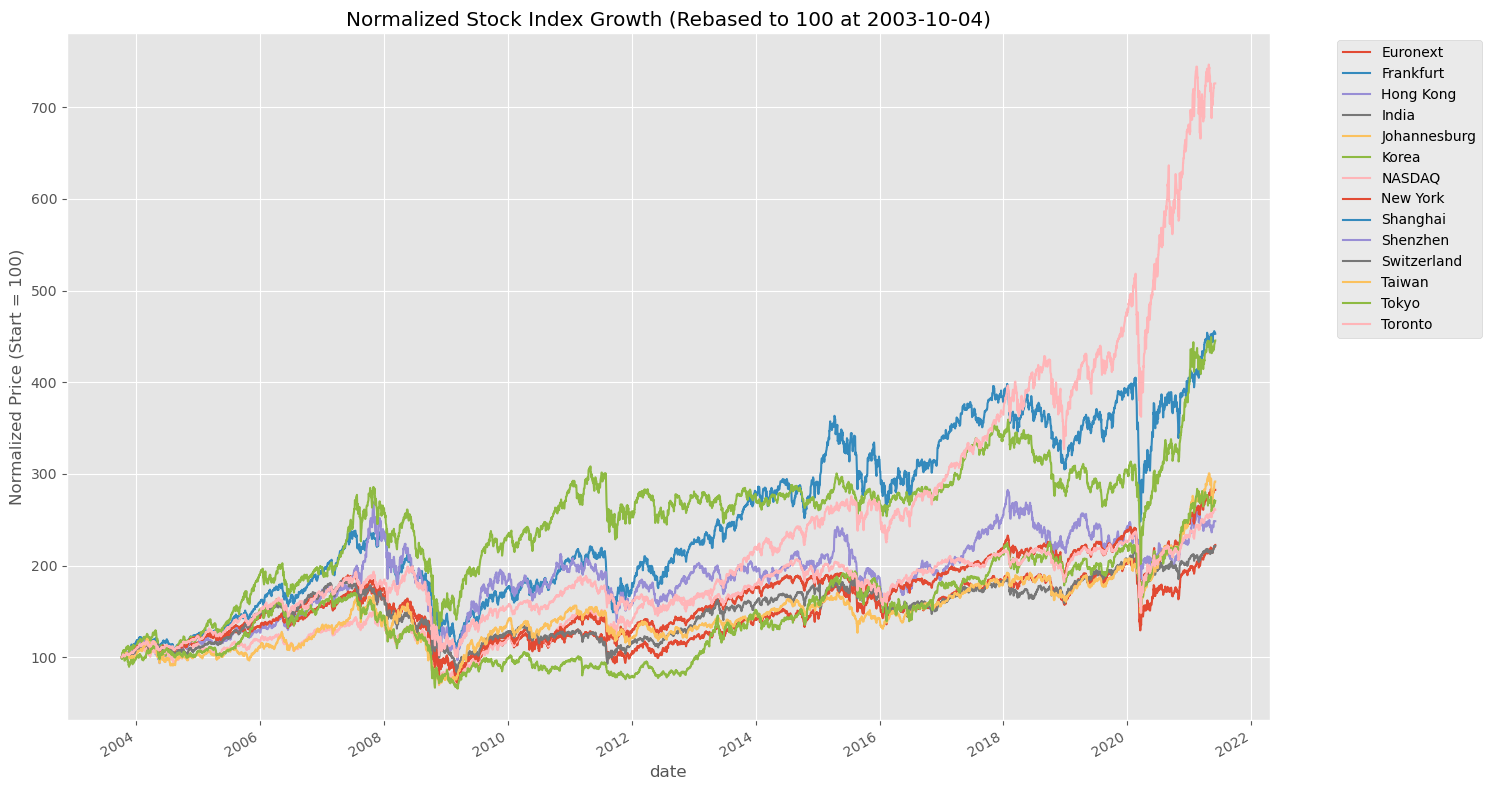

In [5]:
visualization.plot_normalized_comparison(df_raw_pivot, start_date='2003-10-04')

From the index growth chart we can see as opposed to KS11 which is outstanding from others, N100 is more smooth and more stable, as it follows most indices' trend, including on 2008 and on 2020. We can be more assuring in selecting N100 as our main stock index to investigate.

Loading raw data from ../data/indexData.csv...


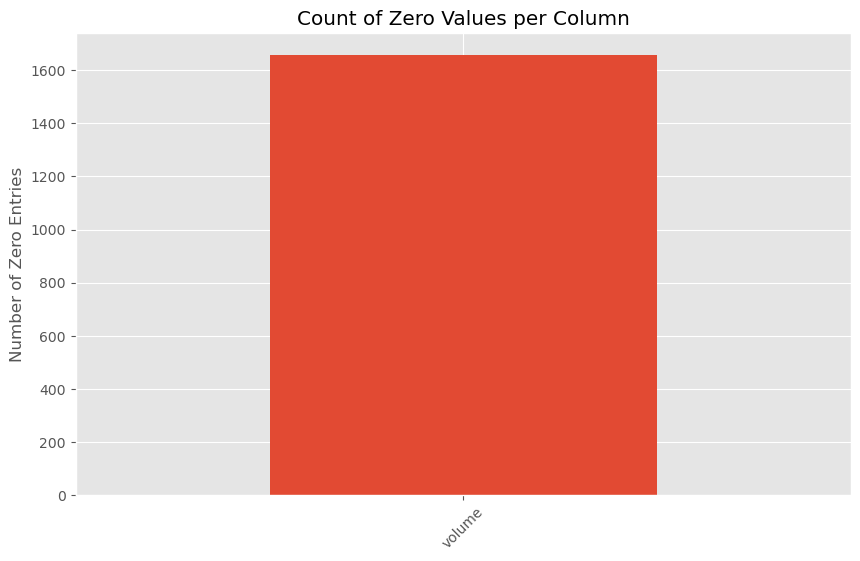

In [6]:
df_raw = data_loader.load_raw_data('N100')
visualization.plot_zero_values(df_raw)

It's very good that the index we selected only has 0 volumes, no other columns have missing data.

In [7]:
df = data_loader.load_data('N100')
print(df.head())

Loading data from ../data/indexData.csv...
           stock_index        open        high         low       close  \
date                                                                     
2005-12-19    Euronext  807.280029  808.539978  805.349976  806.130005   
2005-12-20    Euronext  803.630005  807.260010  802.890015  806.559998   
2005-12-21    Euronext  809.109985  814.270020  808.609985  814.270020   
2005-12-22    Euronext  814.140015  816.289978  813.210022  814.580017   
2005-12-23    Euronext  815.820007  817.169983  813.830017  815.299988   

             Adj Close       volume  
date                                 
2005-12-19  806.130005  214918800.0  
2005-12-20  806.559998  246625000.0  
2005-12-21  814.270020  281866800.0  
2005-12-22  814.580017  179186000.0  
2005-12-23  815.299988  144731000.0  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3817 entries, 2005-12-19 to 2021-06-02
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stock_index  3817 non-null   object 
 1   open         3817 non-null   float64
 2   high         3817 non-null   float64
 3   low          3817 non-null   float64
 4   close        3817 non-null   float64
 5   Adj Close    3817 non-null   float64
 6   volume       3817 non-null   float64
dtypes: float64(6), object(1)
memory usage: 238.6+ KB
None


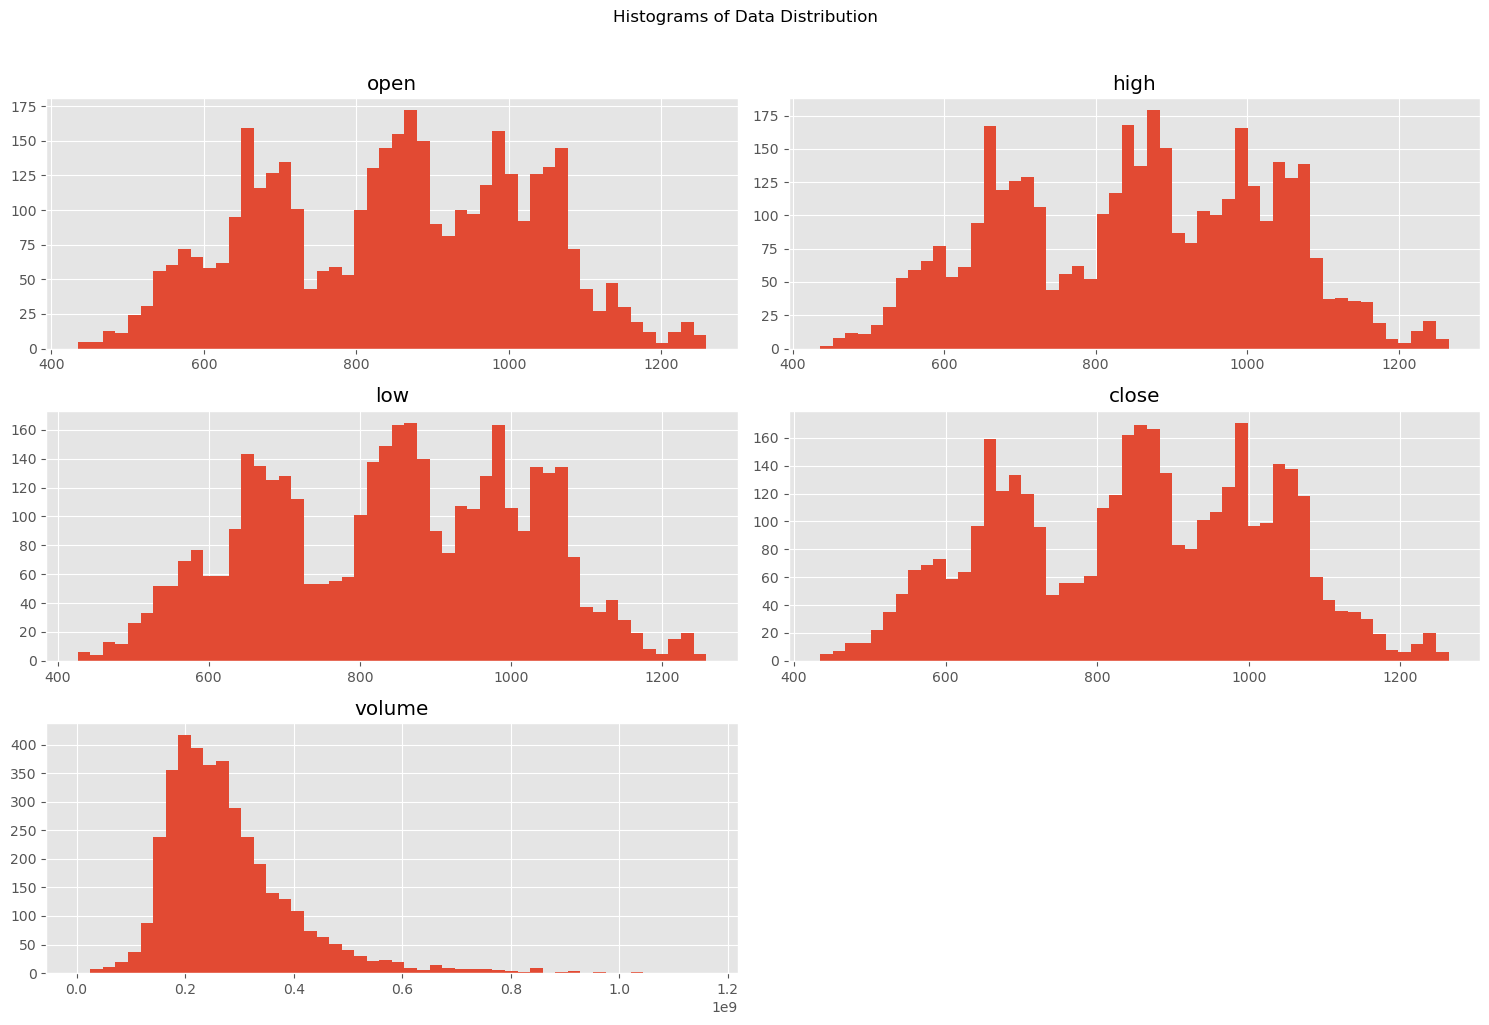

In [9]:
visualization.plot_distributions(df)

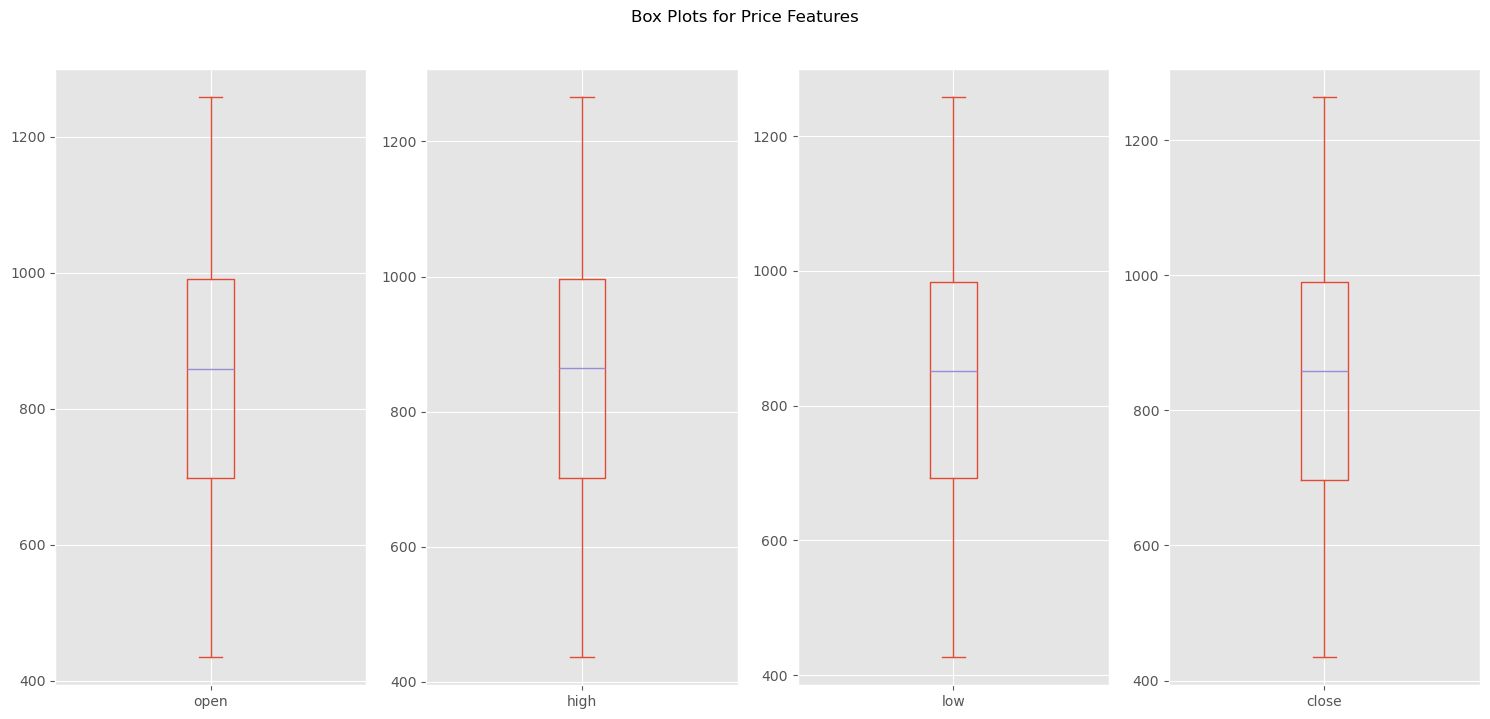

<Figure size 600x600 with 0 Axes>

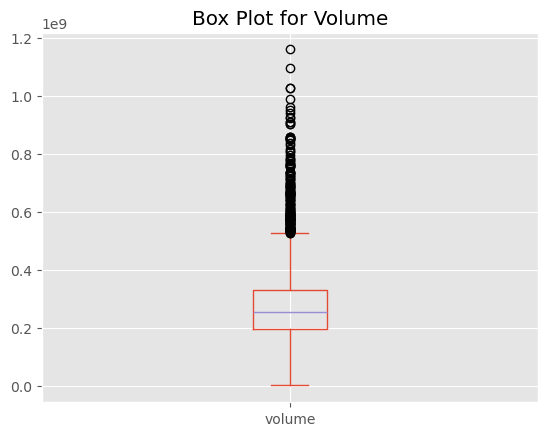

In [10]:
visualization.plot_boxplots(df)